Tutorial on using the Simple Data Transfer Protocol and the Galyleo Data Service to publish and query data

Start by importing the necessary libraries.  We only need four: PANDAS, Requests, OS,  and the Simple Data Transfer Protocol, SDTP

In [ ]:
import requests
import pandas as pd
import sdtp
import os

The first step is to create the schema that we'll be using for our data.  These are the columns of the table we'll create.

In [ ]:
schema = [
    {'name': 'month', 'type': sdtp.SDML_NUMBER},
    {'name': 'cause', 'type': sdtp.SDML_STRING},
    {'name': 'deaths', 'type': sdtp.SDML_NUMBER}
]

The rows are in `records.csv`.  We'll read it into a PANDAS Dataframe and use that to create the SDML Table

In [ ]:
df = pd.read_csv('records.csv')
table = sdtp.SDMLDataFrameTable(schema, df)

We can see all of the values in the 'cause' column

In [ ]:
table.all_values('cause')

Find the range of values in the "deaths" column

In [ ]:
table.range_spec('deaths')

Get all the rows of the table where $500 < \mbox{ deaths } < 1000$

In [ ]:
table.get_filtered_rows({'operator': 'IN_RANGE', 'column': 'deaths', 'min_val': 500, 'max_val': 1000})

Get ready to publish the table.  First, get the json form

In [ ]:
table_to_publish = table.to_json()

set up the headers.  `JUPYTERHUB_API_TOKEN` is built into 

In [ ]:
headers = {'Authorization': f'token {os.environ["JUPYTERHUB_API_TOKEN"]}', 'Content-Type': 'application/json'}

Set the domain of the Hub.  This should be the only cell that needs to change.

In [ ]:
domain = 'galyleo-beta.engagelively.com'

Set up the URL

In [ ]:
base_url = f'https://{domain}/services/galyleo'
url = f'{base_url}/publish_data'

Set up the body

In [ ]:
payload = {'table': table_to_publish, 'name': 'test.sdml'}

Before we publish, click on "Galyleo > Galyleo Service".  You'll see something like this under "View Tables":
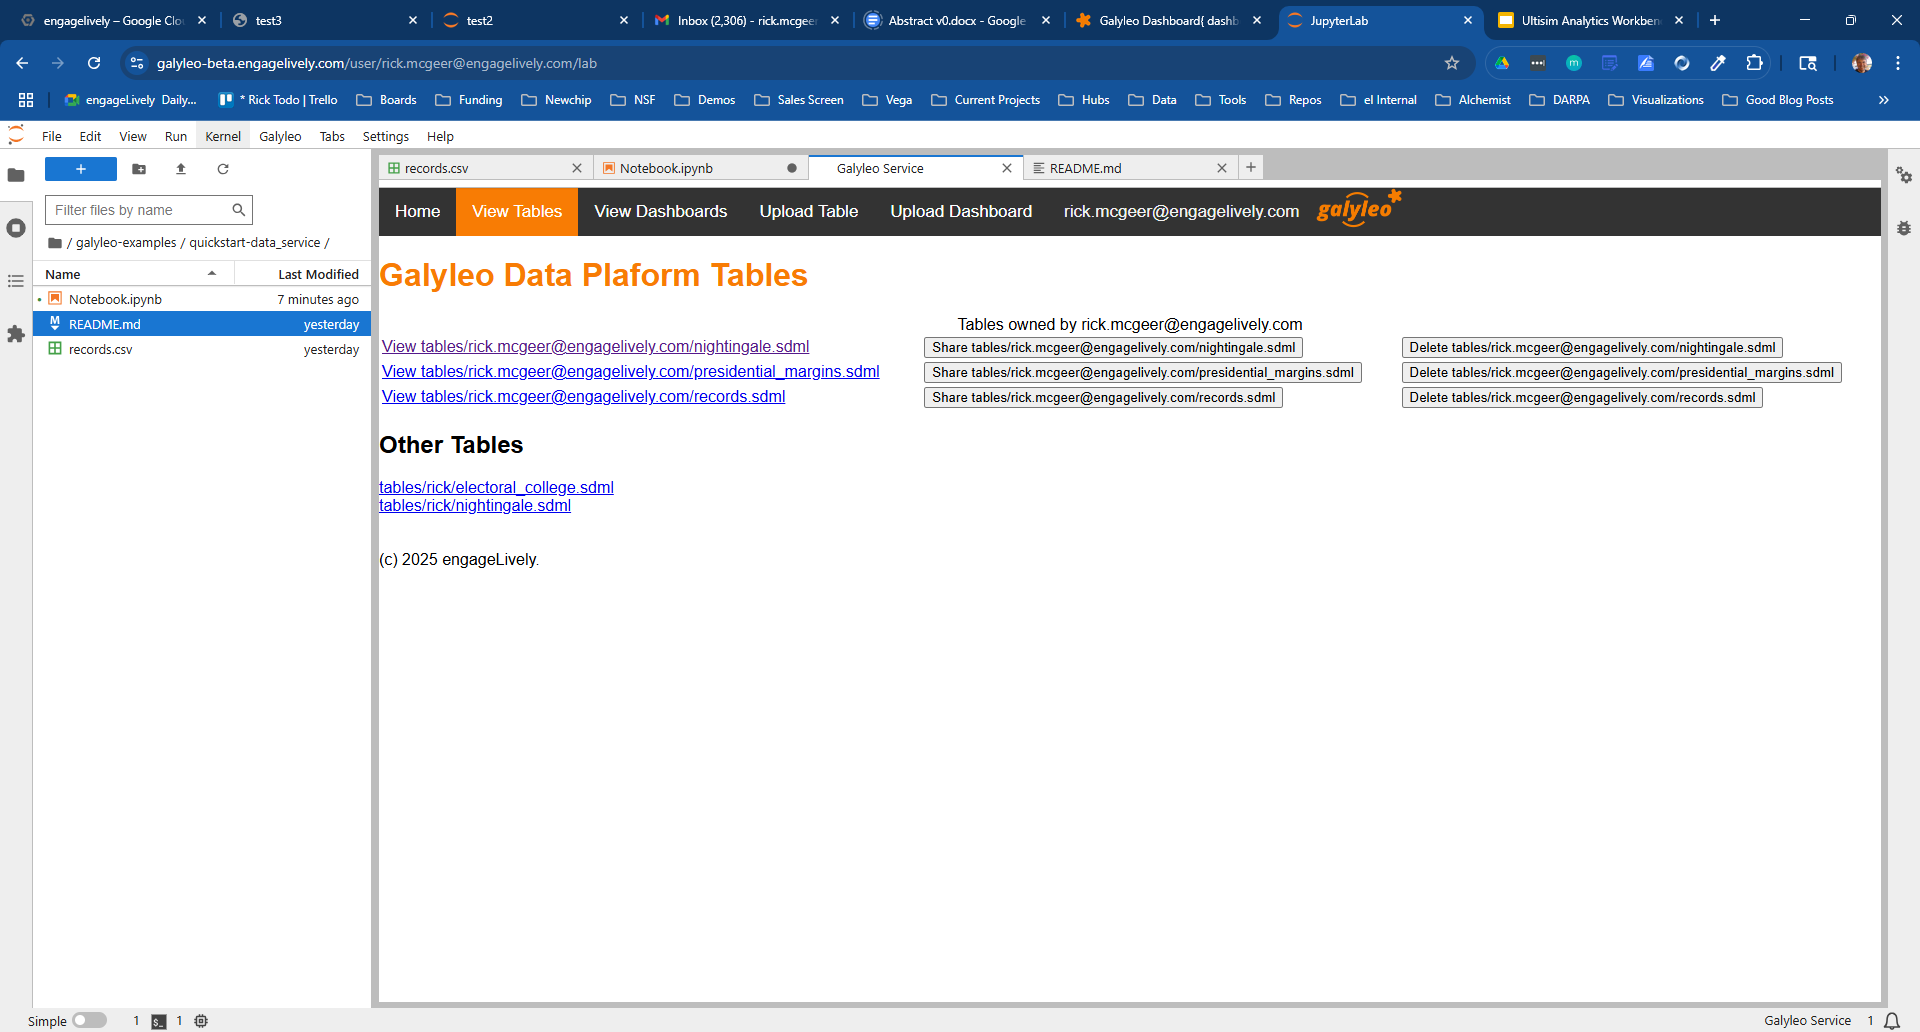

Publish the table 

In [ ]:
response = requests.post(url, headers=headers, json=payload)
response

The response should be the handle of the table.  Save it for later use

In [ ]:
handle=response.text
handle

Click on the services tab again, and check the tables.  You'll see test.sdml is there:
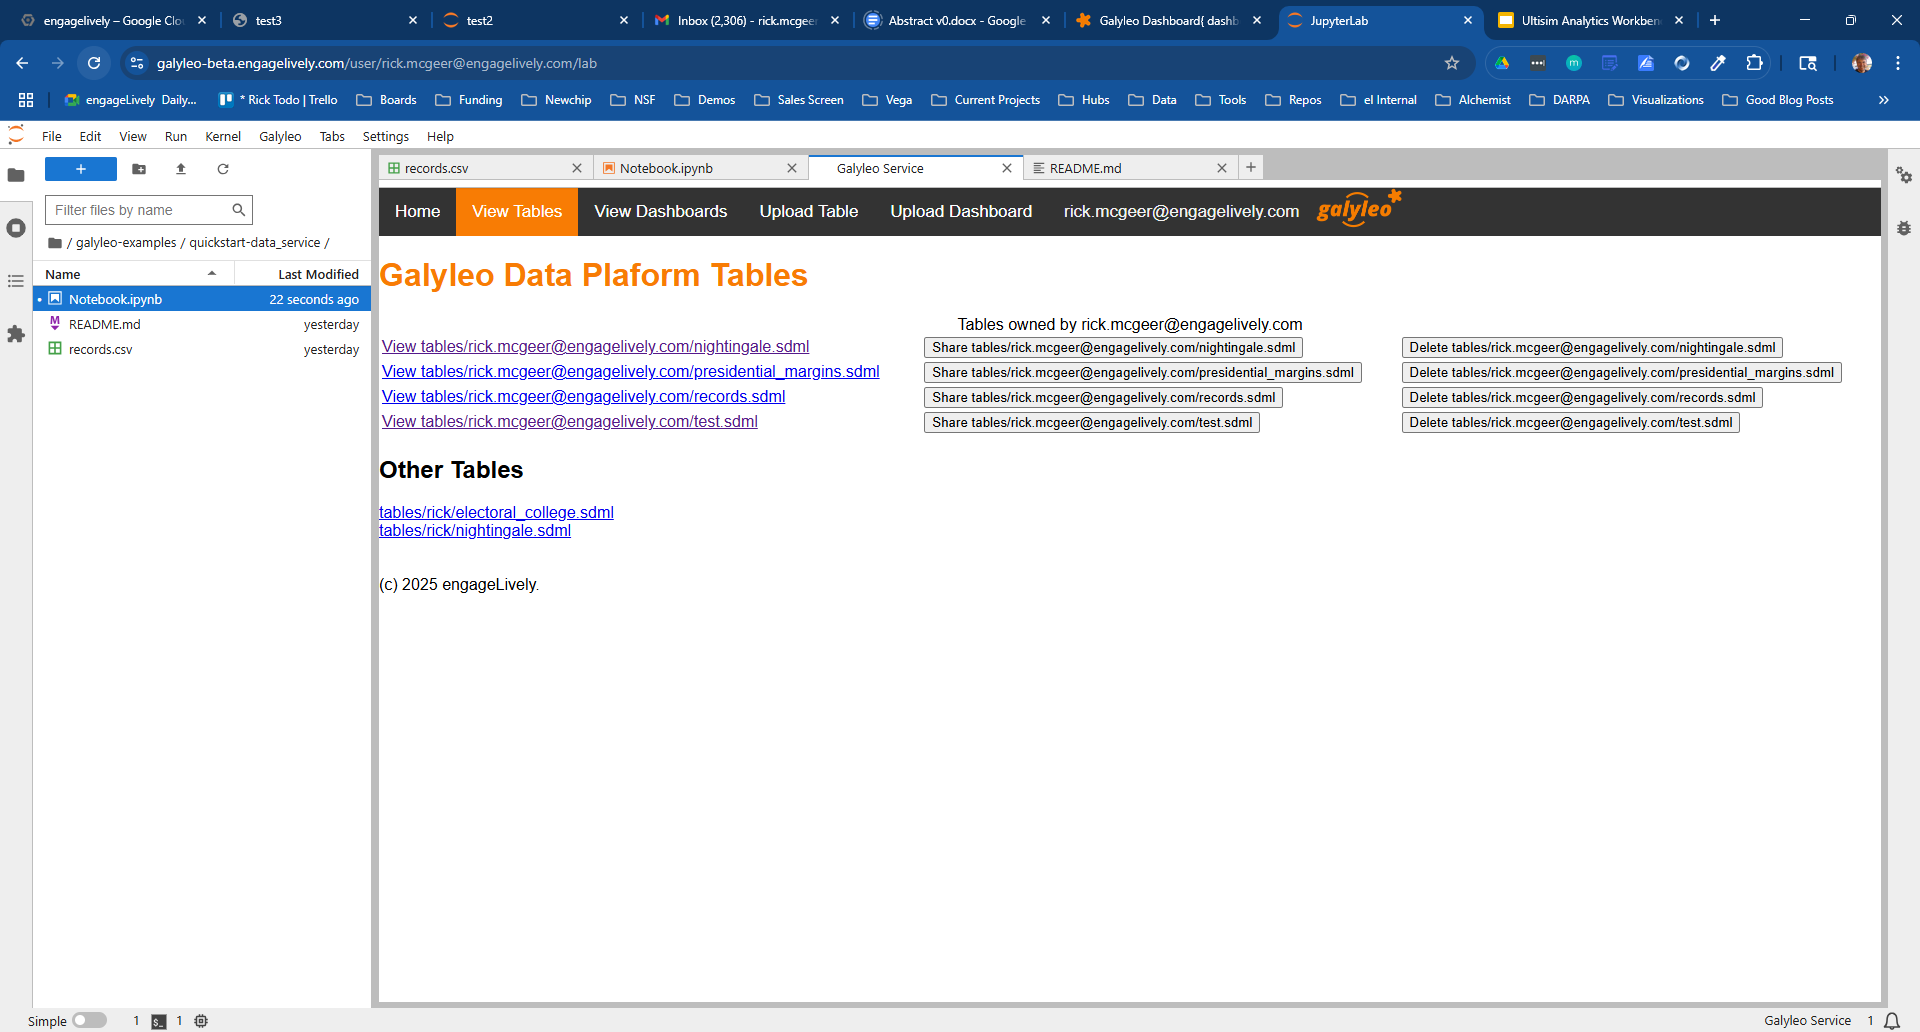

We can directly query the stored (as opposed to the local) table

In [ ]:
query_url = f'{base_url}/get_table_schema?table={handle}'
query_url

In [ ]:
response = requests.get(query_url, headers=headers)
response

In [ ]:
response.json()